## IRIS Dataset Classification Model

In [1]:
#import data from sklearn built-in datasets
import pandas as pd
from sklearn.datasets import load_iris
iris_obj=load_iris(as_frame=True)
df=pd.concat([iris_obj.data,iris_obj.target],axis=1)

In [2]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
print(iris_obj.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.duplicated().sum()

1

In [6]:
df=df.drop_duplicates(ignore_index=True)
df.duplicated().sum()

0

In [7]:
df.shape

(149, 5)

In [8]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


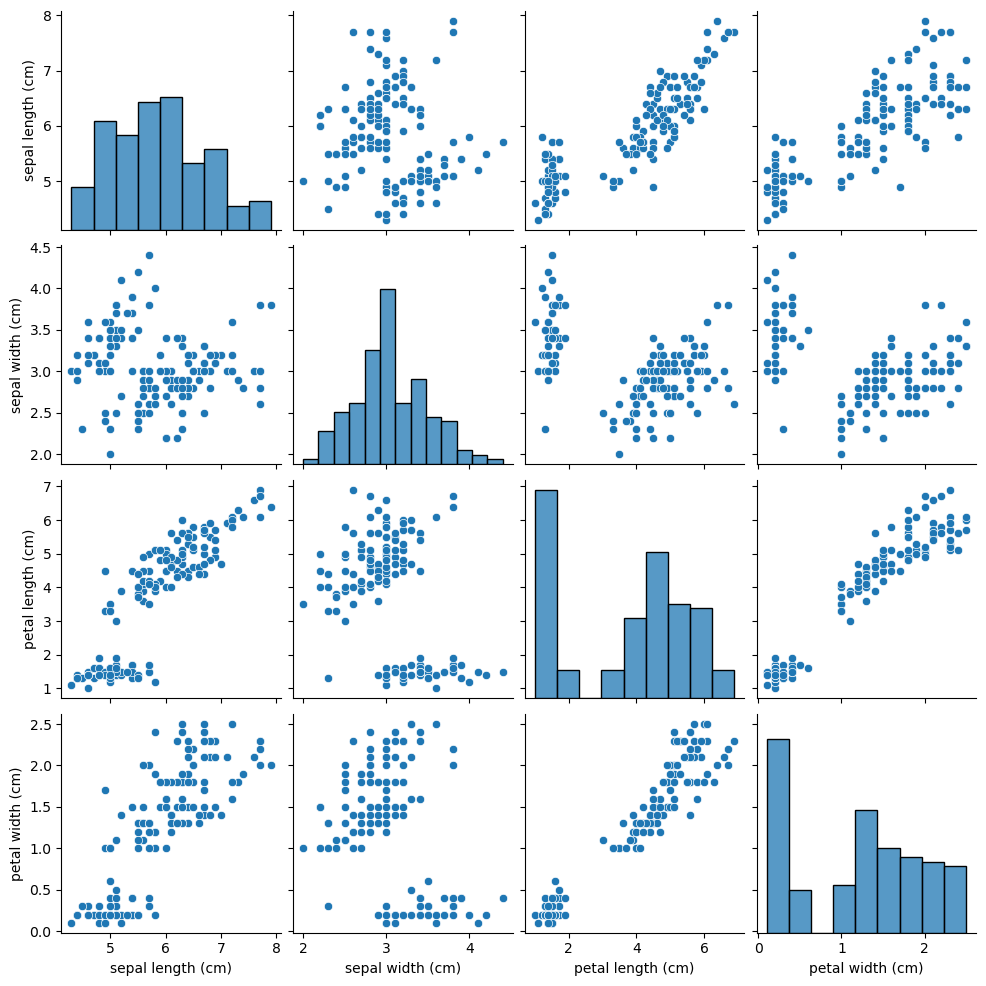

In [9]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(df.iloc[:,:-1])
plt.show()

In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [11]:
#function to check outliers
import numpy as np
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

for feature in df.columns:
    print(f'Outlier in {feature} = {detect_outliers(df[feature])}')

Outlier in sepal length (cm) = []
Outlier in sepal width (cm) = [4.4]
Outlier in petal length (cm) = []
Outlier in petal width (cm) = []
Outlier in target = []


One outlier is present in sepal width.

In [12]:
#remove outlier
df=df.drop(df[df['sepal width (cm)']==4.4].index,axis=0)

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0) #stratify is used for consistent data dividation 

In [14]:
#scaling (min-max)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

-----

In [15]:
#train the model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
#scoring on training data
model.score(X_train,y_train)

0.972972972972973

In [17]:
#scoring on testing data
X_test=scaler.transform(X_test)
model.score(X_test,y_test)

0.972972972972973

In [18]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
confusion_matrix(y_test,pred)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]], dtype=int64)

## Conclusion 
- Dataset has 4 features i.e. sepal length, sepal width, petal length, petal width and 150 samples.
- It has 3 classes 0=setosa, 1=versicolour and 2=virginica.
- Although some features shows high correlation but because of low dimention, there is no need to remove any feature.
- It had one outlier and one duplicate sample that was removed.
- The model is trained with KNeighborsClassifier because distribution of data is not proper.
- Accuracy score of this model is 97% on seen data and same score on seen data.